<a href="https://colab.research.google.com/github/wayneotemah/Learing-TensorFlow/blob/main/multiclass_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-05-21 08:48:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.0MB/s    in 22s     

2023-05-21 08:48:53 (22.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' ")

there are 2 directories and 0 images in '10_food_classes_all_data' 
there are 10 directories and 0 images in '10_food_classes_all_data/test' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/steak' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/ramen' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/sushi' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/pizza' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon' 
there are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream' 
there are 

In [ ]:
!ls -la 10_food_classes_all_data/test

total 128
drwxr-xr-x 12 root root  4096 May 21 08:48 .
drwxr-xr-x  4 root root  4096 May 21 08:48 ..
drwxr-xr-x  2 root root 12288 May 21 08:48 chicken_curry
drwxr-xr-x  2 root root 12288 May 21 08:48 chicken_wings
drwxr-xr-x  2 root root 12288 May 21 08:48 fried_rice
drwxr-xr-x  2 root root 12288 May 21 08:48 grilled_salmon
drwxr-xr-x  2 root root 12288 May 21 08:48 hamburger
drwxr-xr-x  2 root root 12288 May 21 08:48 ice_cream
drwxr-xr-x  2 root root 12288 May 21 08:48 pizza
drwxr-xr-x  2 root root 12288 May 21 08:48 ramen
drwxr-xr-x  2 root root 12288 May 21 08:48 steak
drwxr-xr-x  2 root root 12288 May 21 08:48 sushi


In [ ]:
# set up the train and set directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
# get the sub directories, labels /classnames

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
#  plot in curves seperatly
import matplotlib.pyplot as plt

def  plot_loss_curves(history):
  '''
  return seperate loss curves for trainning and validation metrics 
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

    # plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="accuracy")
  plt.plot(epochs,val_accuracy,label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
# lets visualise a image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

def view_random_image(target_dir,target_class):
  # set up target directories view images 
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # read in the image and plot the image
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"immage shape: {img.shape}") # show the shape of the image

  return img

['591519.jpg']
immage shape: (512, 512, 3)


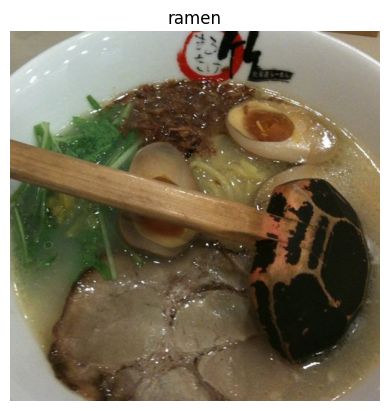

In [ ]:
# visualise
import random

img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

## Preprocess the data

In [ ]:
# data preprocessing with augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen_augmented = ImageDataGenerator(rescale = 1/255,
                                         rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                        shear_range=0.2, # shear the image
                                        zoom_range=0.2, # zoom into the image
                                        width_shift_range=0.2, # shift the image width ways
                                        height_shift_range=0.2, # shift the image height ways
                                        horizontal_flip=True)

image_gen = ImageDataGenerator(rescale = 1/255)

In [ ]:
print("Augmented training images:")
train_data_aug = image_gen_augmented.flow_from_directory(train_dir,
                                                         target_size=(224, 224),
                                                         class_mode = "categorical",
                                                         seed = 42
)


print("Unchanged test images:")
test_data = image_gen.flow_from_directory(test_dir,
                                          target_size=(224, 224),
                                          class_mode = "categorical",
                                          seed = 42)

Augmented training images:
Found 7500 images belonging to 10 classes.
Unchanged test images:
Found 2500 images belonging to 10 classes.


## create baseline

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten, Dense, Activation

In [ ]:
model_1 = Sequential([
    Conv2D(10,3,input_shape = (224,224,3)),
    Activation(activation="relu"),

    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),

    Conv2D(10,3,activation = "relu",),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),

    Flatten(),
    Dense(10,activation = "softmax")      
])


model_1.compile(loss="categorical_crossentropy",
              optimizer = Adam(),
              metrics=["accuracy"])


history_1 = model_1.fit(train_data_aug, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 130s 507ms/step - loss: 2.2882 - accuracy: 0.1239 - val_loss: 2.2278 - val_accuracy: 0.1776
Epoch 2/5
235/235 [==============================] - 118s 504ms/step - loss: 2.1962 - accuracy: 0.1932 - val_loss: 2.0911 - val_accuracy: 0.2444
Epoch 3/5
235/235 [==============================] - 117s 496ms/step - loss: 2.0974 - accuracy: 0.2416 - val_loss: 1.9225 - val_accuracy: 0.3276
Epoch 4/5
235/235 [==============================] - 117s 499ms/step - loss: 2.0086 - accuracy: 0.2957 - val_loss: 1.7970 - val_accuracy: 0.3860
Epoch 5/5
235/235 [==============================] - 116s 495ms/step - loss: 1.9499 - accuracy: 0.3205 - val_loss: 1.8800 - val_accuracy: 0.3452


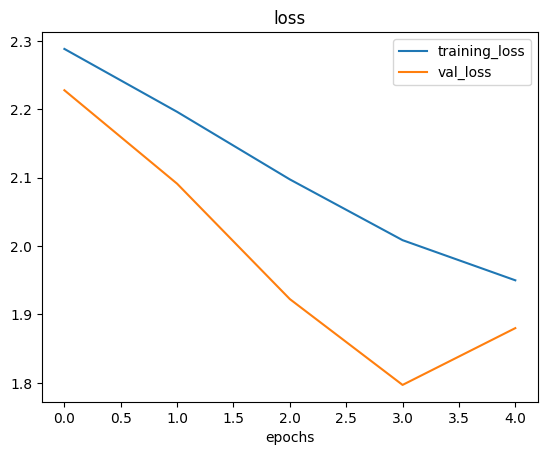

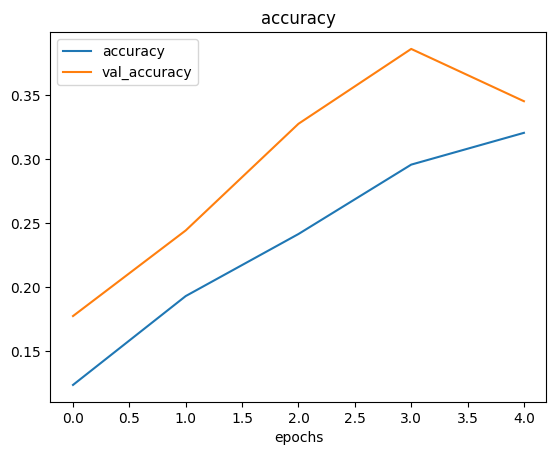

In [ ]:
plot_loss_curves(history_1) 

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

#make a prediction with the model

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFThrPj-3ZrB6gzkGhw1FJ1VJyWQuHL9E4VQ
!wget https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTeqUvHLVFIHC1X8Zrx2VIfs8s20HpEr_bD0Q


--2023-05-21 09:09:04--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSFThrPj-3ZrB6gzkGhw1FJ1VJyWQuHL9E4VQ
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 142.251.12.100, 142.251.12.113, 142.251.12.102, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|142.251.12.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10678 (10K) [image/jpeg]
Saving to: ‘images?q=tbn:ANd9GcSFThrPj-3ZrB6gzkGhw1FJ1VJyWQuHL9E4VQ’

images?q=tbn:ANd9Gc 100%[===================>]  10.43K  --.-KB/s    in 0s      

2023-05-21 09:09:04 (66.7 MB/s) - ‘images?q=tbn:ANd9GcSFThrPj-3ZrB6gzkGhw1FJ1VJyWQuHL9E4VQ’ saved [10678/10678]

--2023-05-21 09:09:04--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTeqUvHLVFIHC1X8Zrx2VIfs8s20HpEr_bD0Q
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 142.251.12.100, 142.251.12.113, 142.251.12.102, ...
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|142.251.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # increase the dimentidimentioins to 4 for tf processing


  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 270ms/step


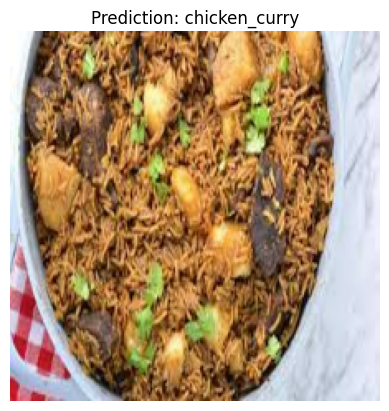

In [ ]:
pred_and_plot(model_1,"image",class_names)

1/1 [==============================] - 0s 111ms/step


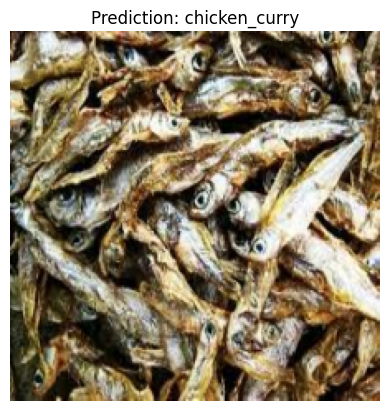

In [ ]:
pred_and_plot(model_1,"image5",class_names)

1/1 [==============================] - 0s 18ms/step


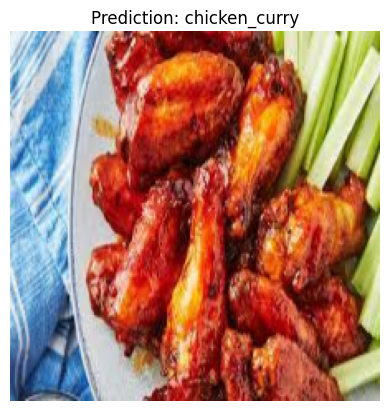

In [ ]:
pred_and_plot(model_1,"image1",class_names)

the predictions as wrong, themodels had 39% accuracy that is why is gets low results

# save the model

In [ ]:
model_1.save('/content/drive/My Drive/ML_models/10_foods_model_1')